## Imports and loads

In [1]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd
from scipy.stats import spearmanr
from sklearn.model_selection import LeaveOneOut
import pickle
from time import time
from  scipy.spatial.distance import squareform
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pickle

In [2]:
!pip install mne==0.19
import mne
!pip install git+https://github.com/UN-GCPDS/python-gcpds.utils.git
from gcpds.utils import loaddb

     |████████████████████████████████| 6.4MB 8.3MB/s 
  Cloning https://github.com/UN-GCPDS/python-gcpds.utils.git to /tmp/pip-req-build-wi60bnub
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-wi60bnub
  Created wheel for gcpds-utils: filename=gcpds_utils-0.1a3-cp36-none-any.whl size=96836 sha256=3289833c822753e8122fc8d7c7c1795079fb113aa679641fd9d417be05d0248a
  Stored in directory: /tmp/pip-ephem-wheel-cache-3x67waog/wheels/ab/4a/1e/d215a31a12c0fa202a9bccc9b9d68874deb08dfdce8b7d43c8
Successfully built gcpds-utils


In [3]:
from mne.io.pick import _picks_to_idx
from mne.viz.topomap import _check_outlines, _draw_outlines
from mne.viz import plot_topomap

In [4]:
FILEID = "1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O grafos_suxchaxfre.zip && rm -rf /tmp/cookies.txt
!dir
!unzip grafos_suxchaxfre.zip

--2020-12-18 22:59:47--  https://docs.google.com/uc?export=download&confirm=&id=1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV
Resolving docs.google.com (docs.google.com)... 173.194.202.139, 173.194.202.102, 173.194.202.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.202.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-0c-docs.googleusercontent.com/docs/securesc/ffhkl1j72nk3p0f1jo6or2fsu1tka91d/119brs1l7nvpdbc4n29m71b9nl71df04/1608332325000/17600740636788319470/16145523320913316597Z/1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV?e=download [following]
--2020-12-18 22:59:48--  https://doc-08-0c-docs.googleusercontent.com/docs/securesc/ffhkl1j72nk3p0f1jo6or2fsu1tka91d/119brs1l7nvpdbc4n29m71b9nl71df04/1608332325000/17600740636788319470/16145523320913316597Z/1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV?e=download
Resolving doc-08-0c-docs.googleusercontent.com (doc-08-0c-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting

## Networks definitions


In [5]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
        
class SMRfeat(BaseEstimator, TransformerMixin):
  def __init__(self):
    self
      
  
  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]


      
      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):   
      
          
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):
      self.fit(Xepochs)
      return self.transform(Xepochs)   
class MCSMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1,droprate=0.2,Mc_iter=100,alpha_dropout=True,plot_hst = False):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
        self.droprate = droprate
        self.Mc_iter = Mc_iter
        self.alpha_dropout = alpha_dropout
        self.plot_hst = plot_hst
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    np.random.seed(seed)
    tf.random.set_seed(seed)
    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    drop_1 = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])
        if self.alpha_dropout:
            drop_1[i] = tf.keras.layers.AlphaDropout(self.droprate,seed=seed)(hiddens[i])
        else:
            drop_1[i] = tf.keras.layers.Dropout(self.droprate)(hiddens[i])
    #concat
    concat = tf.keras.layers.concatenate(drop_1,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)
    if self.alpha_dropout:
        drop_2 = tf.keras.layers.AlphaDropout(rate=self.droprate)(hfi)
    else:
        drop_2 = tf.keras.layers.Dropout(rate=self.droprate)(hfi)
    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(drop_2) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    if self.plot_hst:
        self.plot_history_acc_w()
  def predict(self, X, *_):
    return np.stack([self.model_fun(X,training=True) for sample in range(self.Mc_iter)])#self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
  def get_model(self):
      return self.model_fun
  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return


In [6]:
class SMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    np.random.seed(seed)
    tf.random.set_seed(seed)

    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])

    #concat
    concat = tf.keras.layers.concatenate(hiddens,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)

    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(hfi) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    self.plot_history_acc_w()
  def predict(self, X, *_):
    return  self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
      
  def get_model(self):
      return self.model_fun

  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return

## Functions definitions

In [7]:
def get_weigths(model,bands):
    W = []
    for i in range(bands):
        w = np.sum(abs(mdl.get_layer('h1_'+str(i)).get_weights()[0]),axis=1)
        w = w-min(w)
        w/= max(w)
        W.append(w)
    return W

In [8]:
def create_tensor_giga(graf,ind):
    xtensor = []
    for i in ind:
      if i>= 29 and i<34:
        subjs= graf[i-2,:,:]
      elif i>=34:
        subjs= graf[i-3,:,:]
      else:
        subjs= graf[i-1,:,:]

      try:
        xtensor+=[subjs]
      except:
        print('s'+str(i+1))

    xtensor= np.asarray(xtensor)
    print(xtensor.shape)
    return xtensor

In [9]:
def plot_topomap_cx(rho,fs, channels_names,montage,Ch,thr=0.5,size=(10,10),mode="topo",weigths=True,cmaps="jet",colormap=True,save=False,name=""):
    layout = mne.channels.read_layout('EEG1005')
    info = mne.create_info(layout.names, sfreq=fs, ch_types="eeg",montage=montage)
    pos = np.array([(p[0] + p[2] / 2., p[1] + p[3] / 2.) for p in layout.pos])

    # pick channels
    picks = _picks_to_idx(info,channels_names)
    pos = pos[picks]
    # adjust positions
    pos, outlines = _check_outlines(pos, 'head')
    pos_x = pos[:,0]
    pos_y = pos[:,1]
    names = np.array(layout.names)[picks]
    rho=((rho-rho.min())/(rho.max()-rho.min()))
    cmap = plt.cm.jet
    cNorm  = colors.Normalize(vmin=np.min(rho), vmax=np.max(rho))
    scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

    if weigths:
        rhotopo = squareform(rho).sum(axis=1)
    else:
        rhotopo = rho
    rhotopo = rhotopo-rhotopo.min()
    rhotopo /= rhotopo.max()
    
    f = plt.figure(figsize=size)
    ax = plt.axes()

    if mode=="topo":
        #P = int(0.5*Ch*(Ch-1))

        #plt.figure(figsize=(10,10))
        plot_topomap(rhotopo, pos, cmap=cmaps, show=False, contours=0, sensors=False,vmin=0,vmax=1)

    elif mode=="Cx":
        rhok = squareform(rho)

        if thr >1:
            indx_pct = np.where(np.triu(rhok)>np.percentile(rho, thr))
        else:
            indx_pct = np.where(np.triu(rhok)>thr)
        ax.set(xticks=[], yticks=[], aspect='equal')
        #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
        _draw_outlines(ax, outlines)
        for i in range(np.shape(indx_pct)[-1]):
            ch1=indx_pct[0][i]
            ch2=indx_pct[1][i]     
            ax.arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                    pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                    width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
        for ch1 in  np.unique(np.ravel(indx_pct)):
            ax.scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
            ax.annotate(names[ch1], xy=pos[ch1,:],size=15)
        ax.axis("off")
    elif mode=="All":
        plot_topomap(rhotopo, pos, cmap=cmaps, show=False, contours=0, sensors=False,vmin=0,vmax=1)
        rhok = squareform(rho)

        if thr >1:
            indx_pct = np.where(np.triu(rhok)>np.percentile(rho, thr))
        else:
            indx_pct = np.where(np.triu(rhok)>thr)
        ax.set(xticks=[], yticks=[], aspect='equal')
        #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
        _draw_outlines(ax, outlines)
        for i in range(np.shape(indx_pct)[-1]):
            ch1=indx_pct[0][i]
            ch2=indx_pct[1][i]     
            ax.arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                    pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                    width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
        for ch1 in  np.unique(np.ravel(indx_pct)):
            ax.scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
            ax.annotate(names[ch1], xy=pos[ch1,:],size=15)
        

    if colormap:
        cax = f.add_axes([0.95, 0.125, 0.02, 0.75])
        sm = plt.cm.ScalarMappable(cmap='jet')
        sm.set_array(rho.ravel())
        plt.colorbar(sm,cax=cax)
    
    if save:
        plt.savefig(name+'.eps',format='eps',dpi=100,bbox_inches='tight')

    plt.show()

## Path definition

In [10]:
Path_def = "/content/drive/MyDrive/Papers/CX_Regression/codigos/physionet/Figs/"

## wPLI

### Load Data

In [11]:
FILEID = "1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Data_rest_giga.zip && rm -rf /tmp/cookies.txt
!dir
!unzip Data_rest_giga.zip

--2020-12-18 22:59:51--  https://docs.google.com/uc?export=download&confirm=&id=1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.101, 74.125.142.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-2g-docs.googleusercontent.com/docs/securesc/pmpj50ju17pbvq0tgdk0bdq5vfqa4hql/b53joapbkev6cfhij9eruo2sbocksgp1/1608332325000/13064322042220169363/11486493400961865126Z/1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5?e=download [following]
--2020-12-18 22:59:52--  https://doc-0o-2g-docs.googleusercontent.com/docs/securesc/pmpj50ju17pbvq0tgdk0bdq5vfqa4hql/b53joapbkev6cfhij9eruo2sbocksgp1/1608332325000/13064322042220169363/11486493400961865126Z/1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5?e=download
Resolving doc-0o-2g-docs.googleusercontent.com (doc-0o-2g-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to 

In [12]:
FILEID = "1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O conectividad_frank.zip && rm -rf /tmp/cookies.txt
!dir
!unzip conectividad_frank.zip

--2020-12-18 22:59:54--  https://docs.google.com/uc?export=download&confirm=&id=1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6
Resolving docs.google.com (docs.google.com)... 74.125.20.139, 74.125.20.138, 74.125.20.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-4c-docs.googleusercontent.com/docs/securesc/f9e5bmth5e4dp05q9lbnd0eo9trcrg9u/vnm89o6joc72j5aosjdurb62d0qq134m/1608332325000/17600740636788319470/00984726653196271133Z/1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6?e=download [following]
--2020-12-18 22:59:55--  https://doc-0o-4c-docs.googleusercontent.com/docs/securesc/f9e5bmth5e4dp05q9lbnd0eo9trcrg9u/vnm89o6joc72j5aosjdurb62d0qq134m/1608332325000/17600740636788319470/00984726653196271133Z/1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6?e=download
Resolving doc-0o-4c-docs.googleusercontent.com (doc-0o-4c-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-

In [13]:
sc_ma = StandardScaler()
ma_z = sc_ma.fit_transform(pickle.load(open( "phy_y.pickle", "rb" )))
zpca = StandardScaler().fit_transform(ma_z)
zpca.shape

(105, 1)

In [14]:
xtensor = loadmat("/content/Conectividad_wpli_physionet.mat")['Cxa'][:,:,[0,1,3]]

### Training No MC

Epoch 1/200
3/3 [==============================] - 3s 279ms/step - loss: 712.2153 - val_loss: 654.2444
Epoch 2/200
3/3 [==============================] - 0s 64ms/step - loss: 656.1277 - val_loss: 567.9996
Epoch 3/200
3/3 [==============================] - 0s 59ms/step - loss: 568.3497 - val_loss: 503.5326
Epoch 4/200
3/3 [==============================] - 0s 61ms/step - loss: 499.7269 - val_loss: 445.7533
Epoch 5/200
3/3 [==============================] - 0s 122ms/step - loss: 433.5646 - val_loss: 389.2735
Epoch 6/200
3/3 [==============================] - 0s 59ms/step - loss: 381.5449 - val_loss: 342.4103
Epoch 7/200
3/3 [==============================] - 0s 61ms/step - loss: 334.2372 - val_loss: 299.4766
Epoch 8/200
3/3 [==============================] - 0s 59ms/step - loss: 291.7700 - val_loss: 262.3787
Epoch 9/200
3/3 [==============================] - 0s 62ms/step - loss: 254.9197 - val_loss: 228.8034
Epoch 10/200
3/3 [==============================] - 0s 61ms/step - loss: 222.945

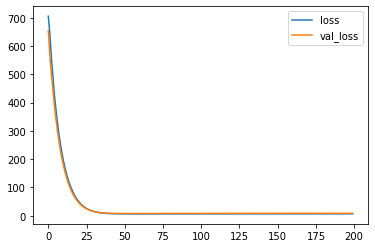

In [15]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots No MC

In [16]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model = {}
#Model["model"] = mdl
Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/wPLI_3f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


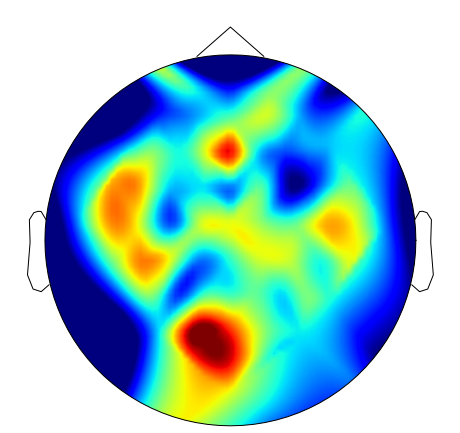

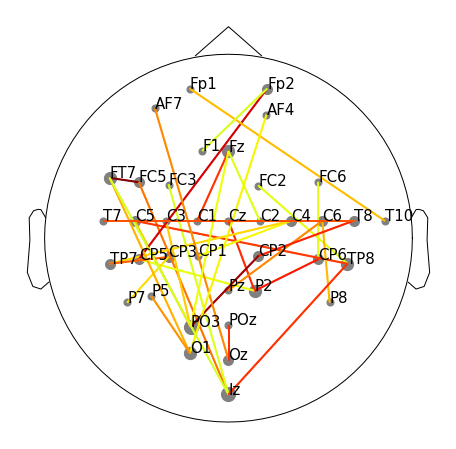

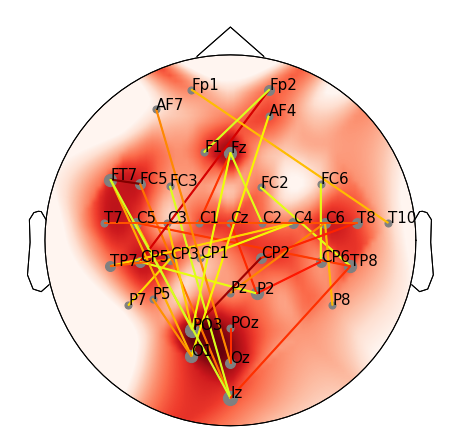

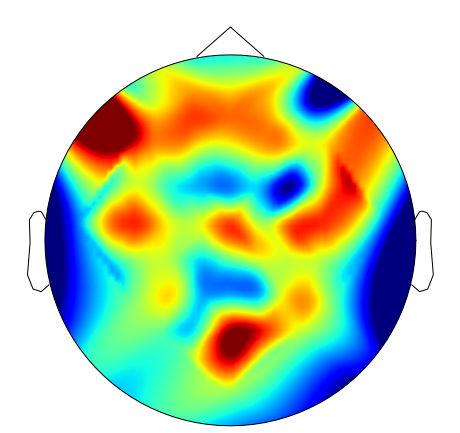

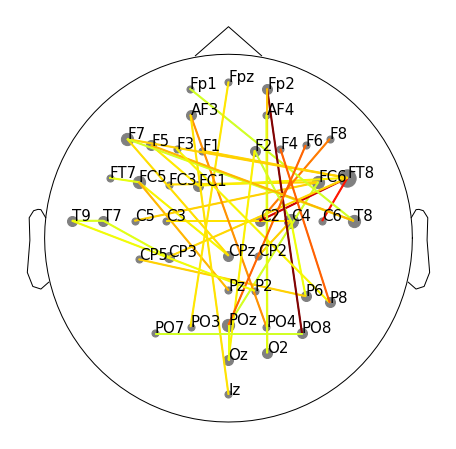

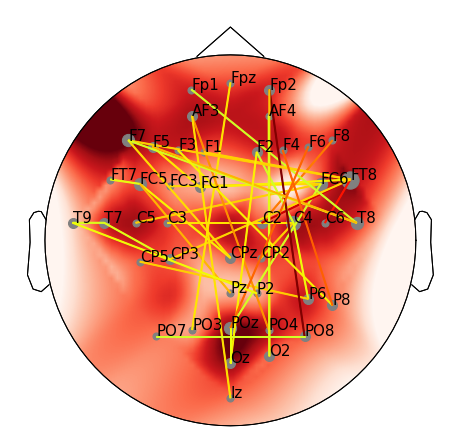

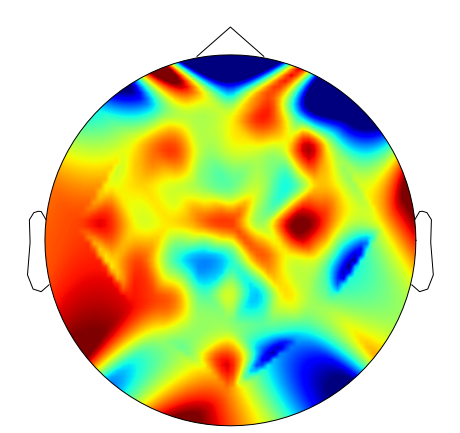

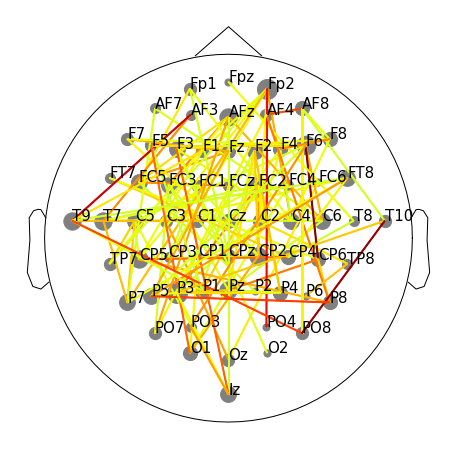

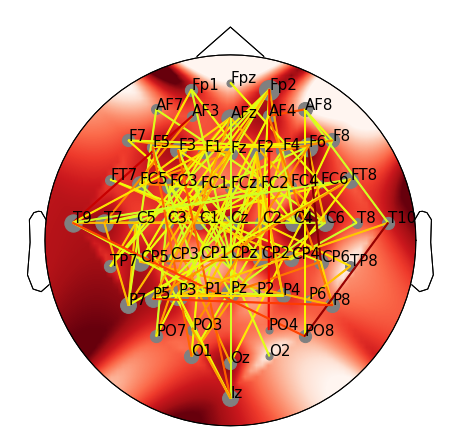

In [17]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_topo_t')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_Cx_t')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_All_t')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_topo_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_Cx_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_All_u')

plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_topo_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_Cx_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_All_B')

### Training MC

Epoch 1/200
3/3 [==============================] - 1s 148ms/step - loss: 711.4148 - val_loss: 658.3989
Epoch 2/200
3/3 [==============================] - 0s 138ms/step - loss: 661.5179 - val_loss: 583.1145
Epoch 3/200
3/3 [==============================] - 0s 66ms/step - loss: 578.5983 - val_loss: 513.8873
Epoch 4/200
3/3 [==============================] - 0s 61ms/step - loss: 508.2579 - val_loss: 459.2209
Epoch 5/200
3/3 [==============================] - 0s 60ms/step - loss: 449.3573 - val_loss: 406.0074
Epoch 6/200
3/3 [==============================] - 0s 58ms/step - loss: 397.6485 - val_loss: 359.5936
Epoch 7/200
3/3 [==============================] - 0s 58ms/step - loss: 350.8224 - val_loss: 316.8643
Epoch 8/200
3/3 [==============================] - 0s 60ms/step - loss: 308.8834 - val_loss: 278.9139
Epoch 9/200
3/3 [==============================] - 0s 60ms/step - loss: 271.5044 - val_loss: 245.0842
Epoch 10/200
3/3 [==============================] - 0s 61ms/step - loss: 238.522

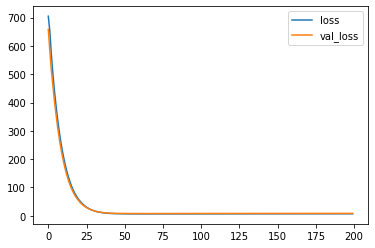

In [18]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots MC

In [19]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model = {}
#Model["model"] = mdl
Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/wPLI_3f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


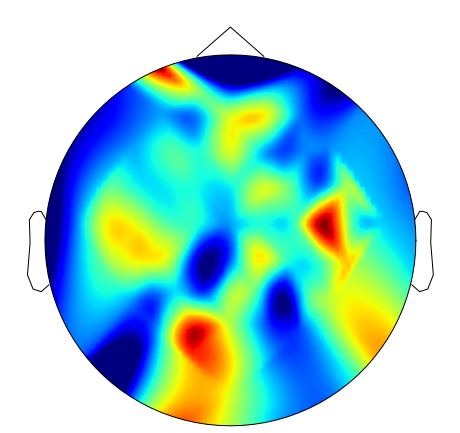

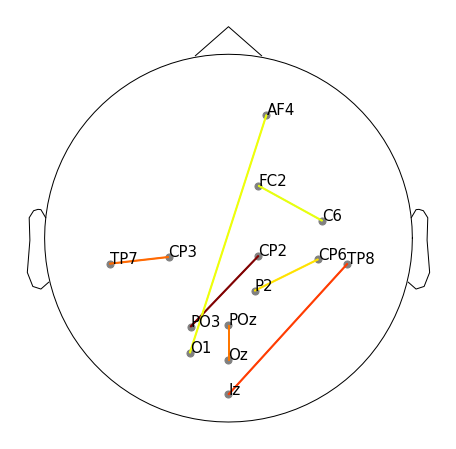

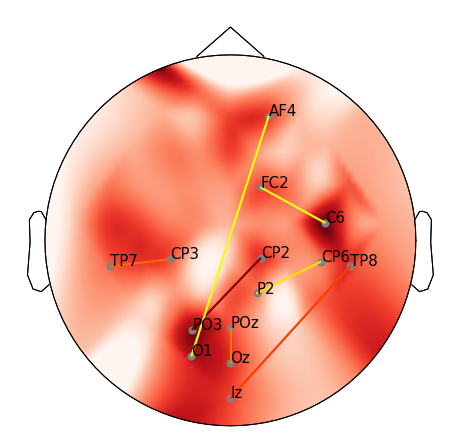

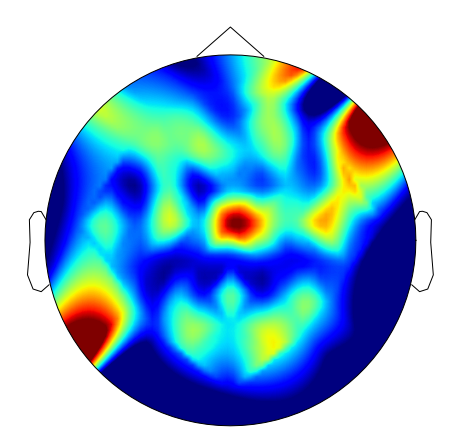

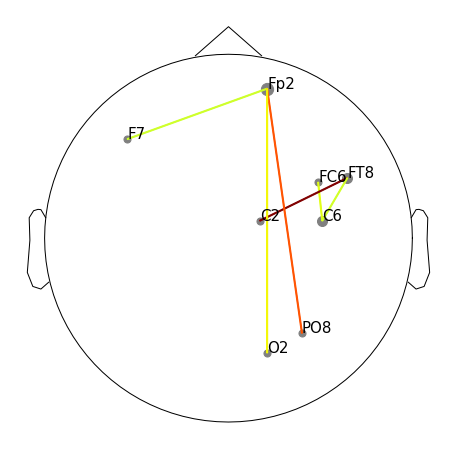

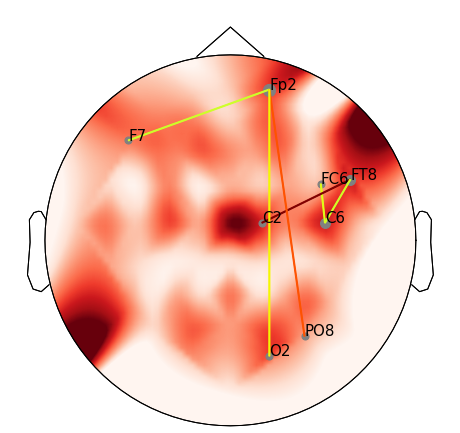

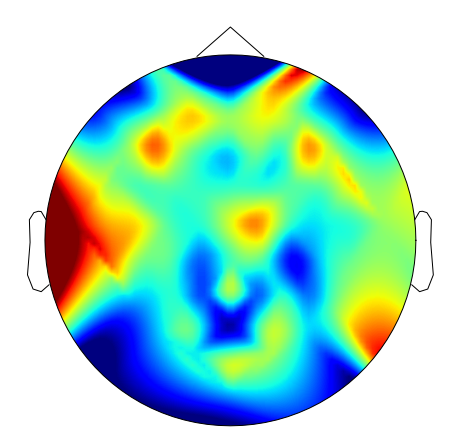

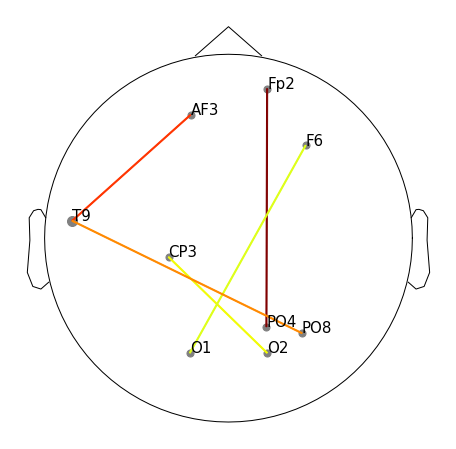

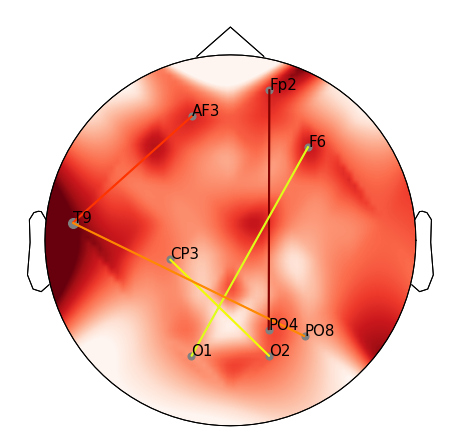

In [20]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_topo_t')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_Cx_t')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_All_t')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_topo_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_Cx_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_All_u')

plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_topo_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_Cx_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_All_B')

## PLV

### Load Data

In [21]:
FILEID = "1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O connectividades_daniel.zip && rm -rf /tmp/cookies.txt
!dir
!unzip connectividades_daniel.zip

--2020-12-18 23:02:10--  https://docs.google.com/uc?export=download&confirm=&id=1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch
Resolving docs.google.com (docs.google.com)... 173.194.202.113, 173.194.202.100, 173.194.202.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.202.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-48-docs.googleusercontent.com/docs/securesc/t63vtbbjherhfkmg2mtgcd6k1rgg7n98/p2dfbmrafjati59r8nsia59dh2gco56g/1608332475000/17600740636788319470/00779402428792229657Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download [following]
--2020-12-18 23:02:11--  https://doc-0c-48-docs.googleusercontent.com/docs/securesc/t63vtbbjherhfkmg2mtgcd6k1rgg7n98/p2dfbmrafjati59r8nsia59dh2gco56g/1608332475000/17600740636788319470/00779402428792229657Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download
Resolving doc-0c-48-docs.googleusercontent.com (doc-0c-48-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting

In [22]:
sc_ma = StandardScaler()
ma_z = sc_ma.fit_transform(pickle.load(open( "phy_y.pickle", "rb" )))
zpca = StandardScaler().fit_transform(ma_z)
zpca.shape

xtensor = pickle.load( open( "connectividad_daniel_phy_3bandas.pickle", "rb" ) )[:,:,:,0]


### training no MC

Epoch 1/200
3/3 [==============================] - 1s 148ms/step - loss: 721.5548 - val_loss: 667.7714
Epoch 2/200
3/3 [==============================] - 0s 61ms/step - loss: 658.2457 - val_loss: 581.5575
Epoch 3/200
3/3 [==============================] - 0s 58ms/step - loss: 566.7269 - val_loss: 510.3443
Epoch 4/200
3/3 [==============================] - 0s 57ms/step - loss: 497.6802 - val_loss: 447.9990
Epoch 5/200
3/3 [==============================] - 0s 59ms/step - loss: 436.7663 - val_loss: 391.8349
Epoch 6/200
3/3 [==============================] - 0s 60ms/step - loss: 381.2807 - val_loss: 341.0219
Epoch 7/200
3/3 [==============================] - 0s 61ms/step - loss: 331.1661 - val_loss: 295.5204
Epoch 8/200
3/3 [==============================] - 0s 59ms/step - loss: 286.8521 - val_loss: 255.4712
Epoch 9/200
3/3 [==============================] - 0s 58ms/step - loss: 248.1919 - val_loss: 220.9786
Epoch 10/200
3/3 [==============================] - 0s 58ms/step - loss: 214.7558

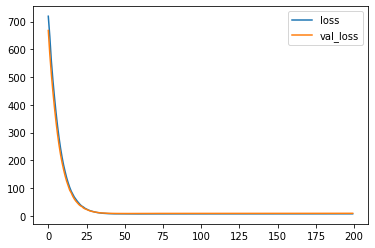

In [23]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots no MC

In [24]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/PLV_3f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


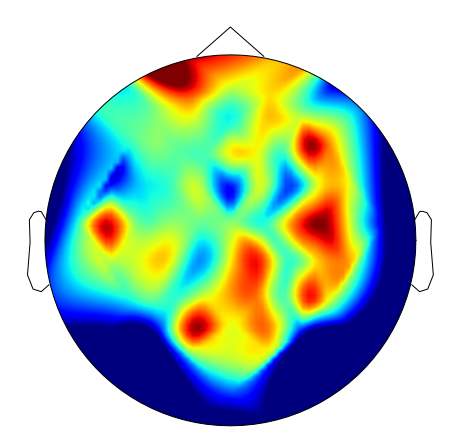

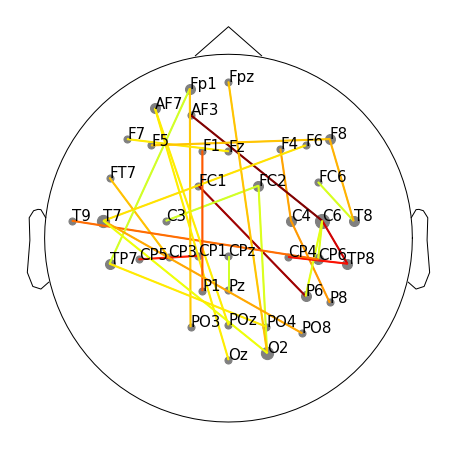

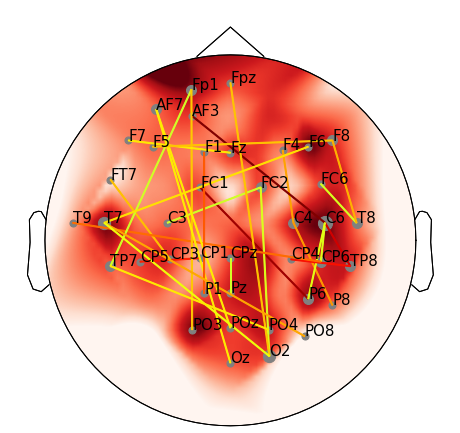

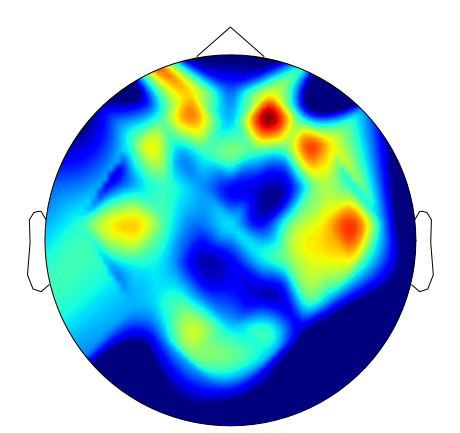

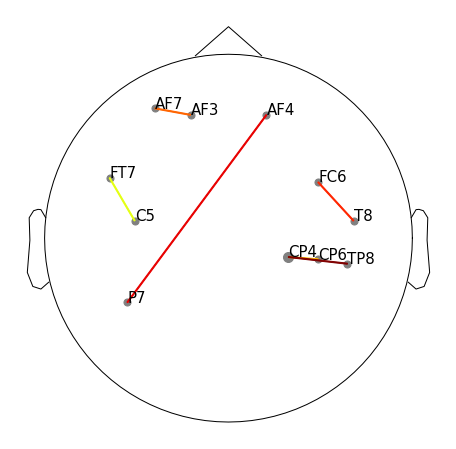

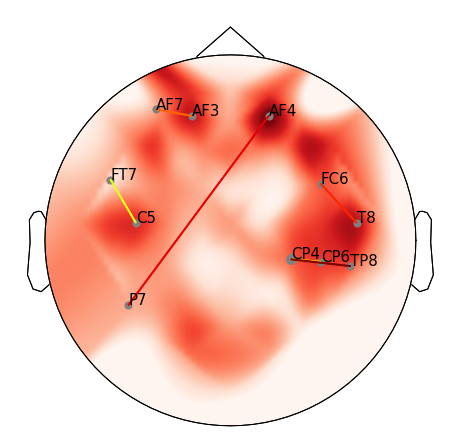

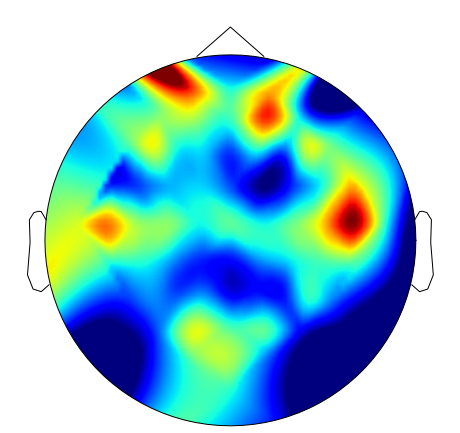

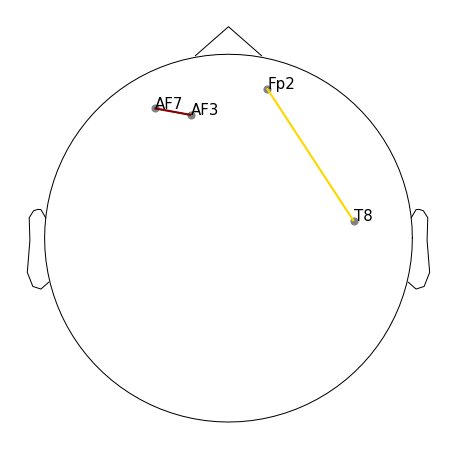

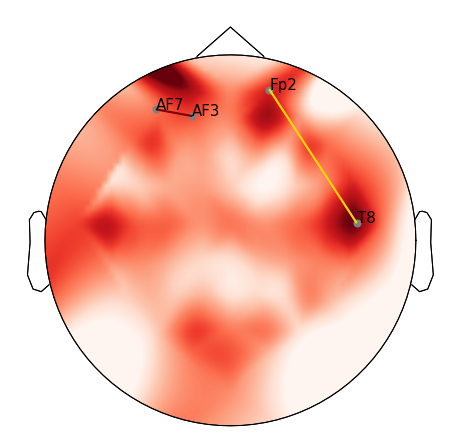

In [25]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_topo_t')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_Cx_t')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_All_t')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_topo_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_Cx_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_All_u')

plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_topo_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_Cx_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_All_B')

### Training MC

Epoch 1/200
3/3 [==============================] - 1s 152ms/step - loss: 716.4621 - val_loss: 697.2673
Epoch 2/200
3/3 [==============================] - 0s 62ms/step - loss: 675.6464 - val_loss: 587.1769
Epoch 3/200
3/3 [==============================] - 0s 138ms/step - loss: 576.6725 - val_loss: 514.0058
Epoch 4/200
3/3 [==============================] - 0s 59ms/step - loss: 506.1691 - val_loss: 456.0290
Epoch 5/200
3/3 [==============================] - 0s 59ms/step - loss: 445.1873 - val_loss: 400.8506
Epoch 6/200
3/3 [==============================] - 0s 59ms/step - loss: 391.0690 - val_loss: 350.9473
Epoch 7/200
3/3 [==============================] - 0s 59ms/step - loss: 341.4565 - val_loss: 304.7348
Epoch 8/200
3/3 [==============================] - 0s 59ms/step - loss: 295.9921 - val_loss: 263.9612
Epoch 9/200
3/3 [==============================] - 0s 60ms/step - loss: 256.1243 - val_loss: 228.4894
Epoch 10/200
3/3 [==============================] - 0s 61ms/step - loss: 221.657

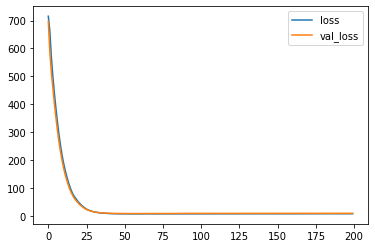

In [26]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots MC

In [27]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/PLV_3f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


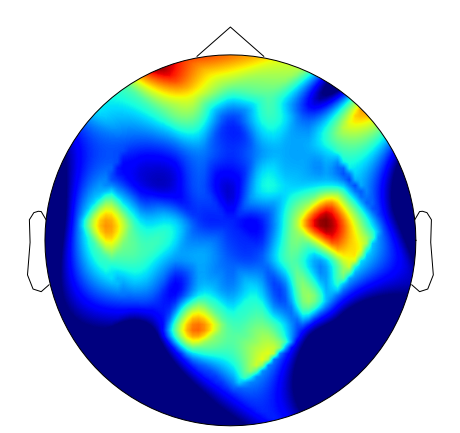

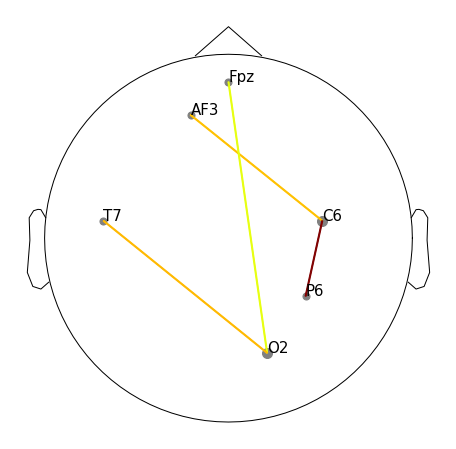

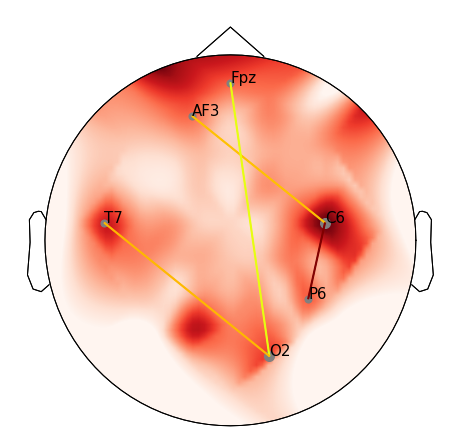

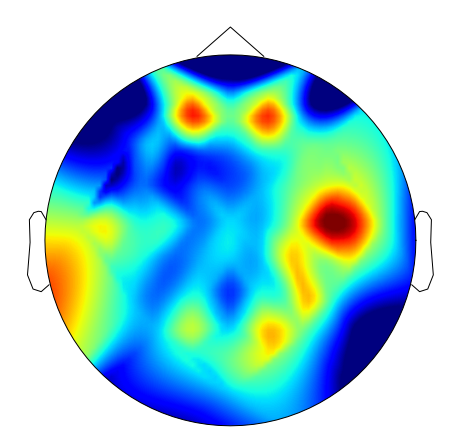

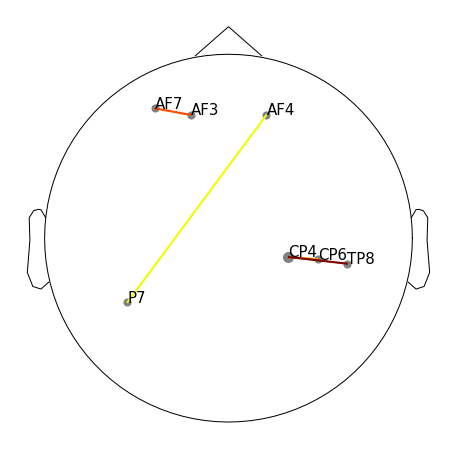

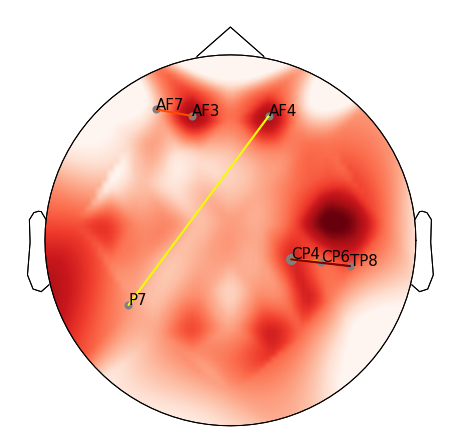

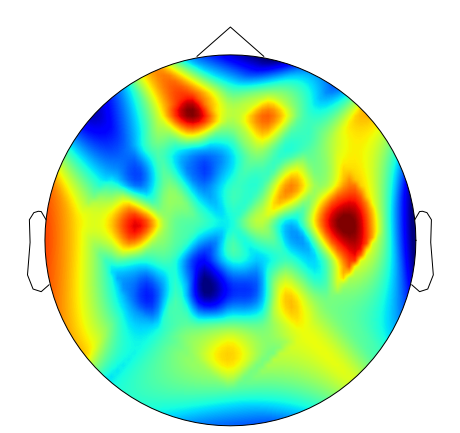

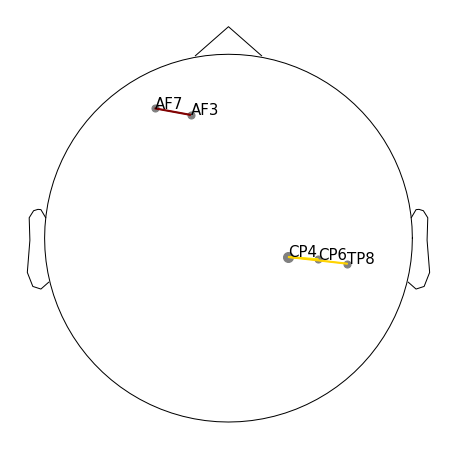

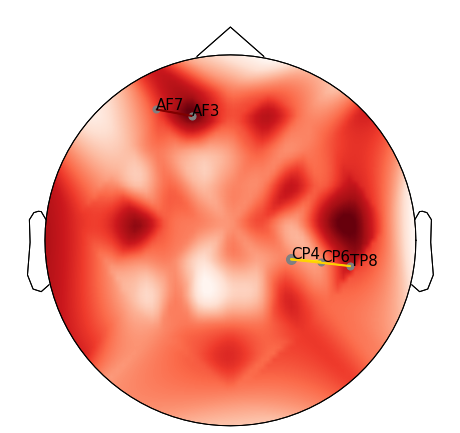

In [28]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_topo_t')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_Cx_t')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_All_t')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_topo_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_Cx_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_All_u')

plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_topo_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_Cx_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_All_B')

## Strength Thr

### Load Data

In [29]:
sc_ma = StandardScaler()
ma_z = sc_ma.fit_transform(pickle.load(open( "phy_y.pickle", "rb" )))
zpca = StandardScaler().fit_transform(ma_z)
zpca.shape

(105, 1)

In [30]:
xtensor = pickle.load(open( "phy_V2_suxchaxfre.pickle", "rb" ))[0][:,:,[0,1,2]]

### Training no MC

Epoch 1/200
3/3 [==============================] - 1s 112ms/step - loss: 5.5810 - val_loss: 5.3200
Epoch 2/200
3/3 [==============================] - 0s 108ms/step - loss: 5.2246 - val_loss: 5.3566
Epoch 3/200
3/3 [==============================] - 0s 22ms/step - loss: 5.0443 - val_loss: 5.2375
Epoch 4/200
3/3 [==============================] - 0s 22ms/step - loss: 4.9384 - val_loss: 5.3256
Epoch 5/200
3/3 [==============================] - 0s 22ms/step - loss: 4.8061 - val_loss: 5.2045
Epoch 6/200
3/3 [==============================] - 0s 21ms/step - loss: 4.6668 - val_loss: 5.1750
Epoch 7/200
3/3 [==============================] - 0s 22ms/step - loss: 4.5864 - val_loss: 5.1347
Epoch 8/200
3/3 [==============================] - 0s 24ms/step - loss: 4.5023 - val_loss: 5.0922
Epoch 9/200
3/3 [==============================] - 0s 26ms/step - loss: 4.4370 - val_loss: 5.0993
Epoch 10/200
3/3 [==============================] - 0s 24ms/step - loss: 4.4011 - val_loss: 5.0998
Epoch 11/200
3/3 

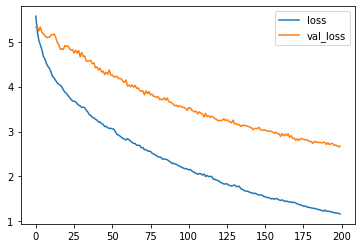

In [31]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots no MC

In [32]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Strength_tr_3f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


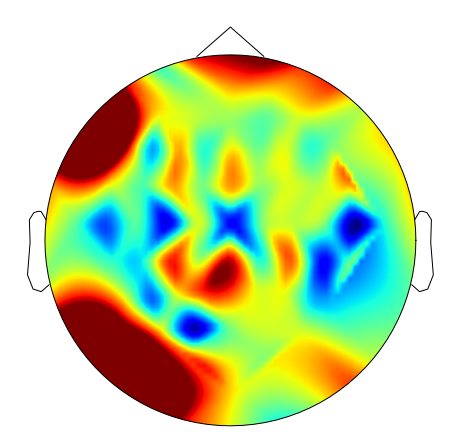

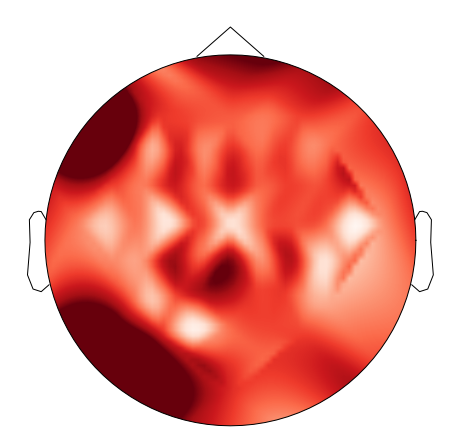

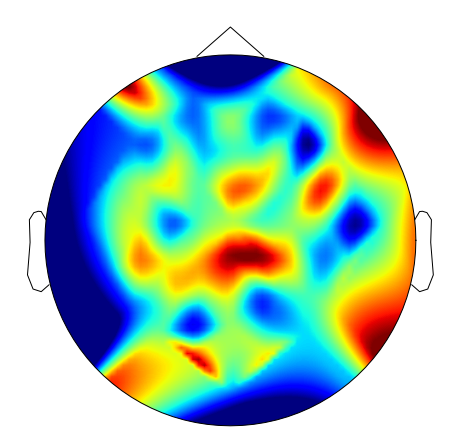

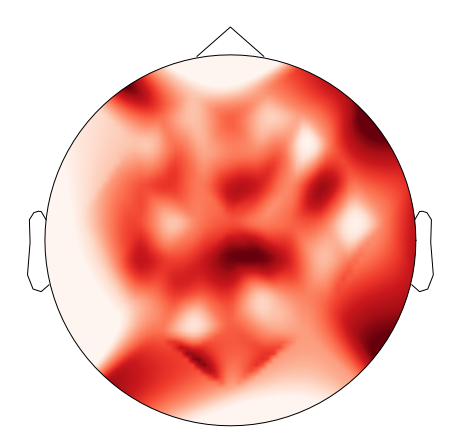

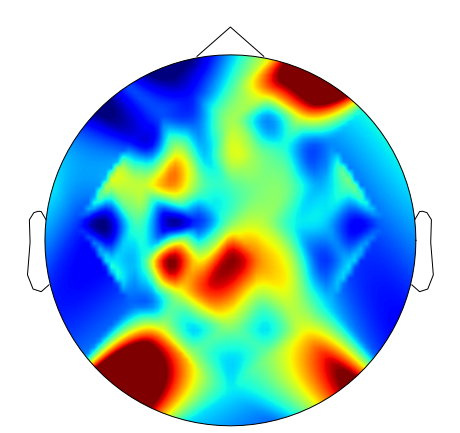

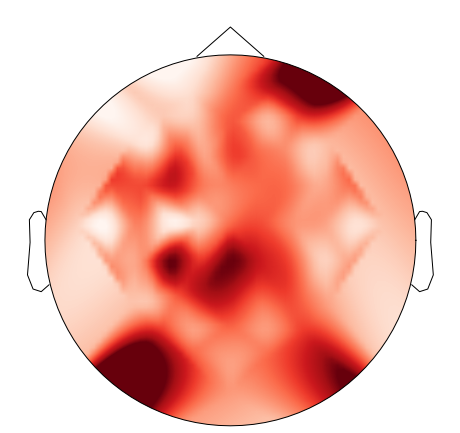

In [33]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_3f_topo_t')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_3f_All_t')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_3f_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_Cx_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_3f_All_u')

plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_3f_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_Cx_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_3f_All_B')

### Training MC

Epoch 1/200
3/3 [==============================] - 1s 186ms/step - loss: 5.6070 - val_loss: 5.3642
Epoch 2/200
3/3 [==============================] - 0s 24ms/step - loss: 5.3663 - val_loss: 5.2329
Epoch 3/200
3/3 [==============================] - 0s 22ms/step - loss: 5.1426 - val_loss: 5.3303
Epoch 4/200
3/3 [==============================] - 0s 22ms/step - loss: 5.1571 - val_loss: 5.2176
Epoch 5/200
3/3 [==============================] - 0s 24ms/step - loss: 4.9931 - val_loss: 5.0855
Epoch 6/200
3/3 [==============================] - 0s 23ms/step - loss: 5.0385 - val_loss: 5.1297
Epoch 7/200
3/3 [==============================] - 0s 25ms/step - loss: 4.8614 - val_loss: 5.2270
Epoch 8/200
3/3 [==============================] - 0s 24ms/step - loss: 4.8423 - val_loss: 5.2058
Epoch 9/200
3/3 [==============================] - 0s 22ms/step - loss: 4.7709 - val_loss: 5.0550
Epoch 10/200
3/3 [==============================] - 0s 24ms/step - loss: 4.7522 - val_loss: 4.9981
Epoch 11/200
3/3 [

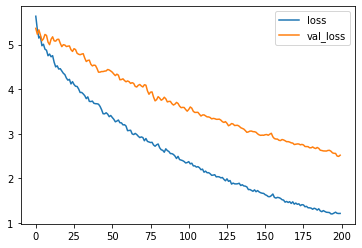

In [34]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots MC

In [35]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Strength_tr_3f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


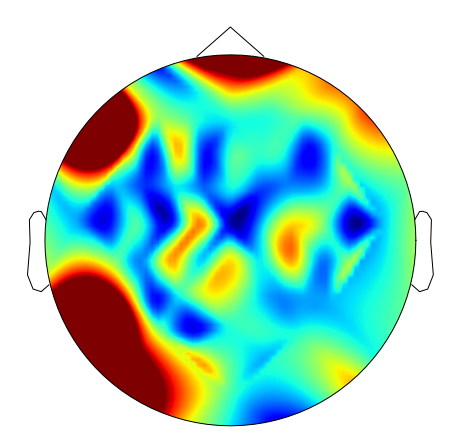

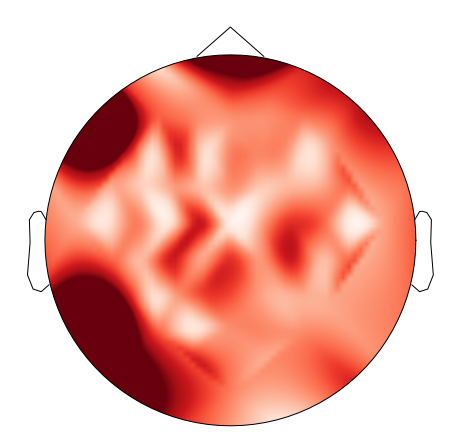

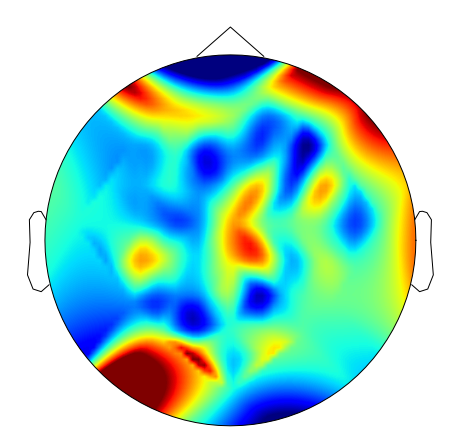

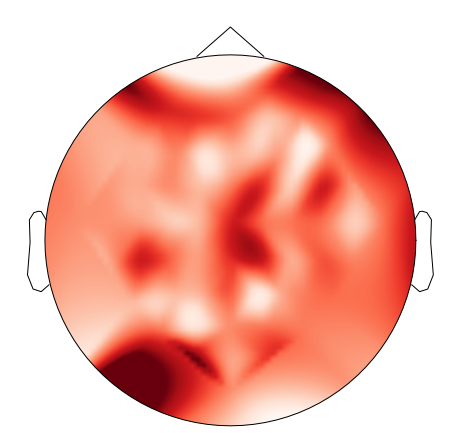

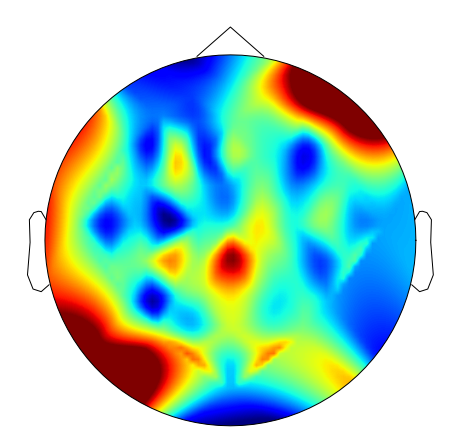

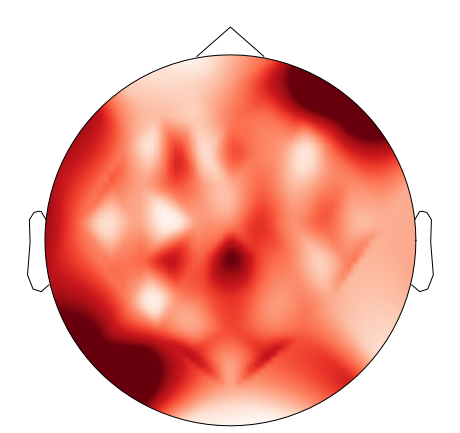

In [36]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_3f_MC_topo_t')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_MC_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_3f_MC_All_t')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_3f_MC_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_MC_Cx_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_3f_MC_All_u')

plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_3f_MC_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_2f_MC_Cx_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_tr_3f_MC_All_B')

## Strength

### Load Data

In [37]:
sc_ma = StandardScaler()
ma_z = sc_ma.fit_transform(pickle.load(open( "phy_y.pickle", "rb" )))
zpca = StandardScaler().fit_transform(ma_z)
zpca.shape

(105, 1)

In [38]:
xtensor = pickle.load(open("phy_V1_suxchaxfre.pickle", "rb" ))[0][:,:,[0,1,2]]

### Training no MC

Epoch 1/200
3/3 [==============================] - 1s 110ms/step - loss: 5.5249 - val_loss: 5.3309
Epoch 2/200
3/3 [==============================] - 0s 25ms/step - loss: 5.1613 - val_loss: 5.3117
Epoch 3/200
3/3 [==============================] - 0s 27ms/step - loss: 5.0158 - val_loss: 5.2501
Epoch 4/200
3/3 [==============================] - 0s 24ms/step - loss: 4.9259 - val_loss: 5.2682
Epoch 5/200
3/3 [==============================] - 0s 23ms/step - loss: 4.7680 - val_loss: 5.1724
Epoch 6/200
3/3 [==============================] - 0s 22ms/step - loss: 4.6275 - val_loss: 5.1768
Epoch 7/200
3/3 [==============================] - 0s 24ms/step - loss: 4.5648 - val_loss: 5.0462
Epoch 8/200
3/3 [==============================] - 0s 22ms/step - loss: 4.5262 - val_loss: 5.0952
Epoch 9/200
3/3 [==============================] - 0s 22ms/step - loss: 4.4258 - val_loss: 5.0597
Epoch 10/200
3/3 [==============================] - 0s 22ms/step - loss: 4.3586 - val_loss: 5.0179
Epoch 11/200
3/3 [

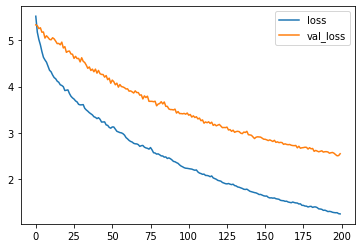

In [39]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots no MC

In [40]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Strength_3f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


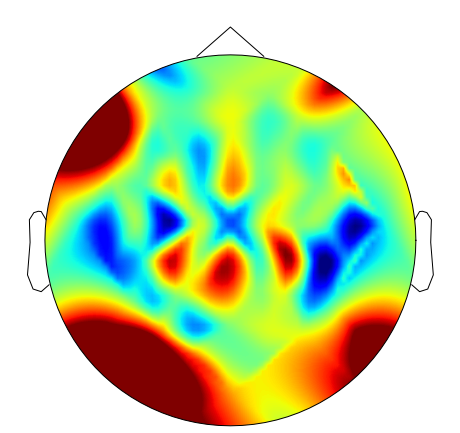

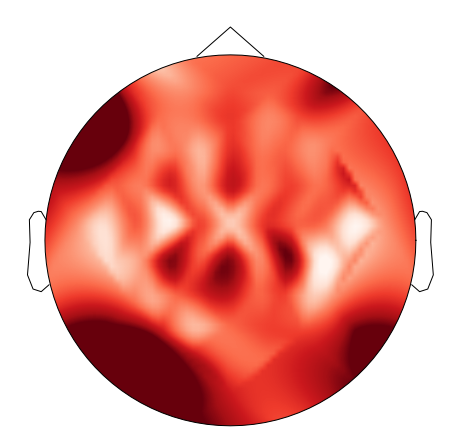

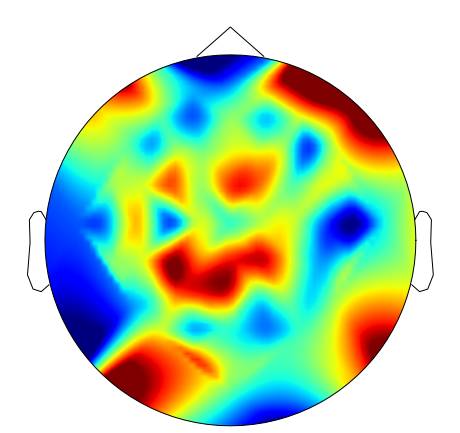

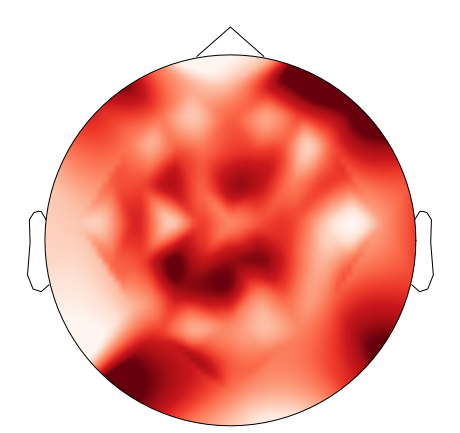

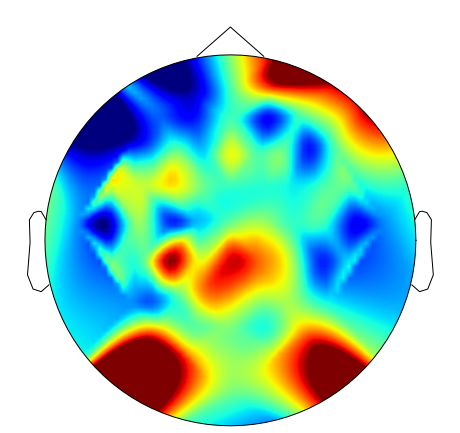

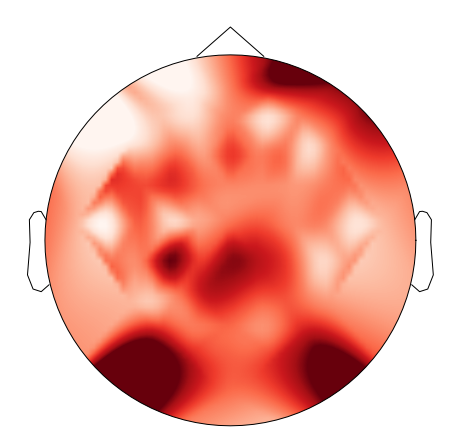

In [41]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_3f_topo_t')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_3f_All_t')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_3f_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_Cx_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_3f_All_u')

plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_3f_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_Cx_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_3f_All_B')

### Training MC

Epoch 1/200
3/3 [==============================] - 1s 115ms/step - loss: 5.5578 - val_loss: 5.3477
Epoch 2/200
3/3 [==============================] - 0s 24ms/step - loss: 5.3605 - val_loss: 5.1982
Epoch 3/200
3/3 [==============================] - 0s 23ms/step - loss: 5.1226 - val_loss: 5.2777
Epoch 4/200
3/3 [==============================] - 0s 27ms/step - loss: 5.2492 - val_loss: 5.1454
Epoch 5/200
3/3 [==============================] - 0s 23ms/step - loss: 5.0403 - val_loss: 5.0691
Epoch 6/200
3/3 [==============================] - 0s 22ms/step - loss: 5.0347 - val_loss: 5.1842
Epoch 7/200
3/3 [==============================] - 0s 21ms/step - loss: 4.9007 - val_loss: 5.2779
Epoch 8/200
3/3 [==============================] - 0s 23ms/step - loss: 4.7821 - val_loss: 5.2286
Epoch 9/200
3/3 [==============================] - 0s 28ms/step - loss: 4.7494 - val_loss: 5.0462
Epoch 10/200
3/3 [==============================] - 0s 23ms/step - loss: 4.7402 - val_loss: 4.9562
Epoch 11/200
3/3 [

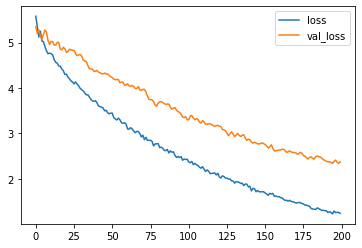

In [42]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots MC

In [43]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Strength_3f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


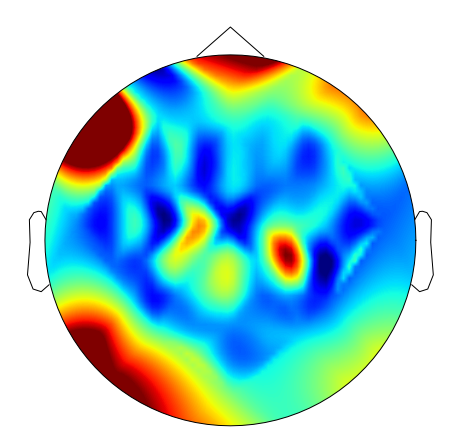

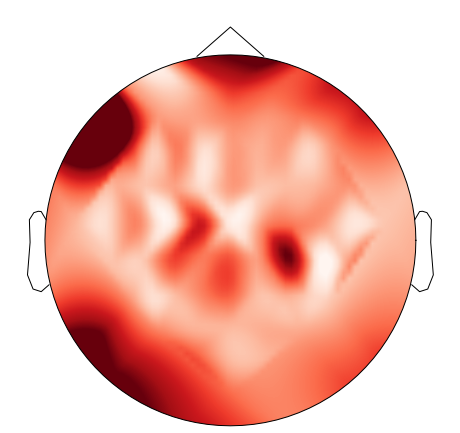

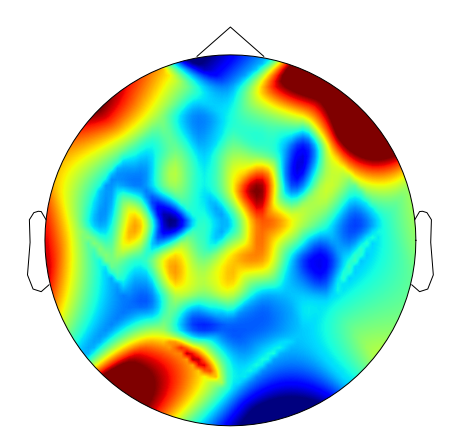

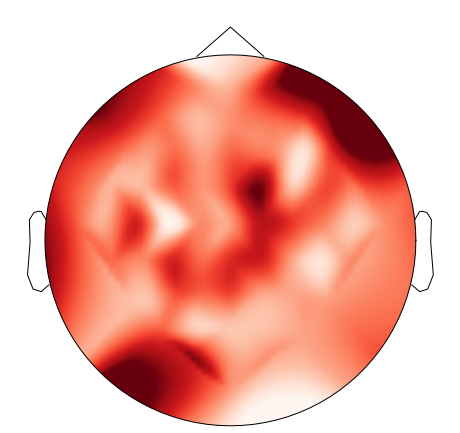

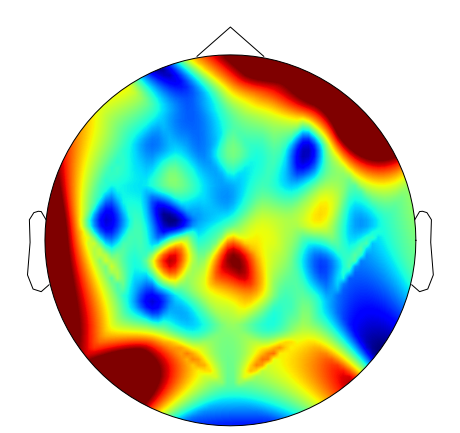

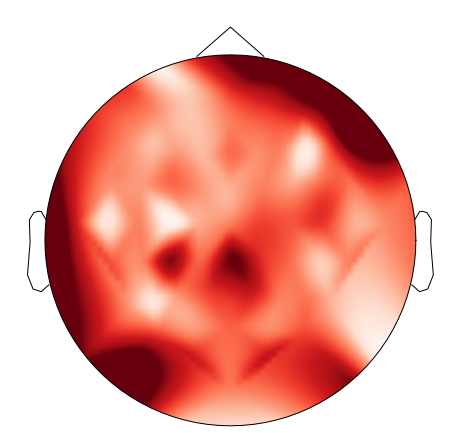

In [44]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_3f_MC_topo_t')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_MC_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_3f_MC_All_t')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_3f_MC_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_MC_Cx_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_3f_MC_All_u')

plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_3f_MC_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Strength_2f_MC_Cx_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Strength_3f_MC_All_B')

## Clustering Thr

### Load Data

In [45]:
sc_ma = StandardScaler()
ma_z = sc_ma.fit_transform(pickle.load(open( "phy_y.pickle", "rb" )))
zpca = StandardScaler().fit_transform(ma_z)
zpca.shape

(105, 1)

In [46]:
xtensor = pickle.load(open("phy_V2_suxchaxfre.pickle", "rb" ))[1][:,:,[0,1,2]]

### Training no MC

Epoch 1/200
3/3 [==============================] - 1s 116ms/step - loss: 5.6352 - val_loss: 5.3584
Epoch 2/200
3/3 [==============================] - 0s 25ms/step - loss: 5.2874 - val_loss: 5.3447
Epoch 3/200
3/3 [==============================] - 0s 22ms/step - loss: 5.0925 - val_loss: 5.4515
Epoch 4/200
3/3 [==============================] - 0s 22ms/step - loss: 4.9299 - val_loss: 5.4886
Epoch 5/200
3/3 [==============================] - 0s 23ms/step - loss: 4.7499 - val_loss: 5.4614
Epoch 6/200
3/3 [==============================] - 0s 23ms/step - loss: 4.6657 - val_loss: 5.3405
Epoch 7/200
3/3 [==============================] - 0s 100ms/step - loss: 4.5924 - val_loss: 5.2502
Epoch 8/200
3/3 [==============================] - 0s 24ms/step - loss: 4.4777 - val_loss: 5.2729
Epoch 9/200
3/3 [==============================] - 0s 22ms/step - loss: 4.4225 - val_loss: 5.3070
Epoch 10/200
3/3 [==============================] - 0s 21ms/step - loss: 4.3569 - val_loss: 5.2925
Epoch 11/200
3/3 

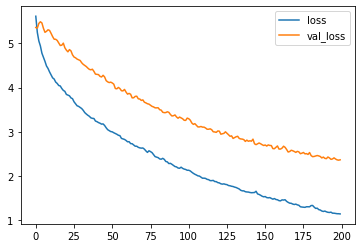

In [47]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots No MC

In [48]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Clustering_tr_3f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


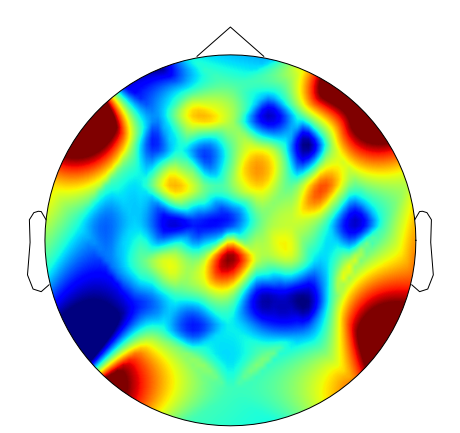

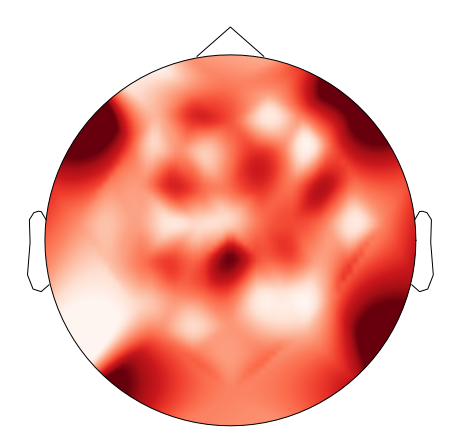

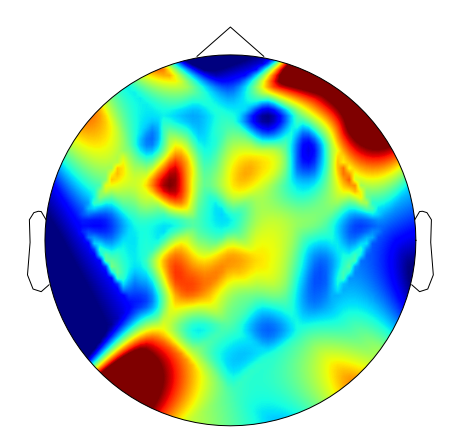

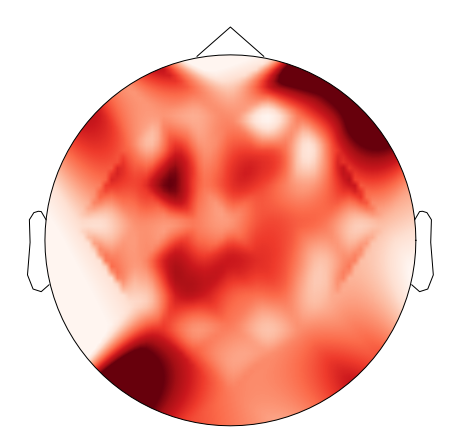

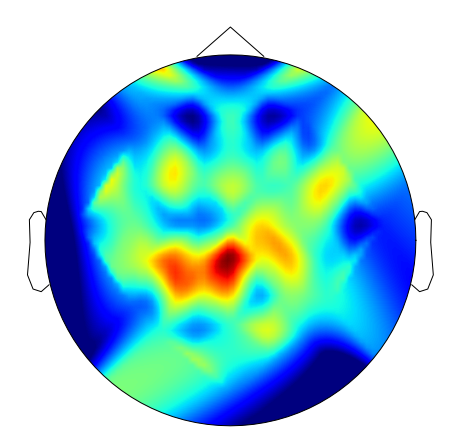

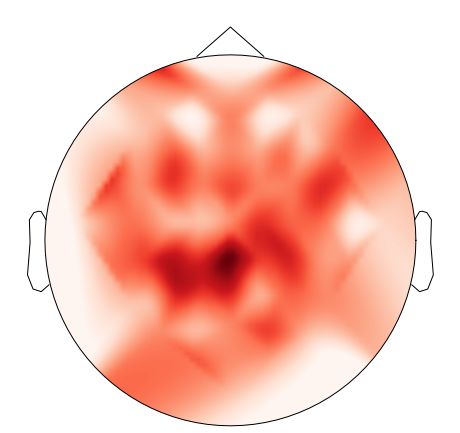

In [49]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_3f_topo_t')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_3f_All_t')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_3f_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_Cx_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_3f_All_u')

plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_3f_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_Cx_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_3f_All_B')

### Training MC

Epoch 1/200
3/3 [==============================] - 1s 114ms/step - loss: 5.6647 - val_loss: 5.4649
Epoch 2/200
3/3 [==============================] - 0s 100ms/step - loss: 5.3966 - val_loss: 5.4628
Epoch 3/200
3/3 [==============================] - 0s 22ms/step - loss: 5.3068 - val_loss: 5.3895
Epoch 4/200
3/3 [==============================] - 0s 22ms/step - loss: 5.1315 - val_loss: 5.4047
Epoch 5/200
3/3 [==============================] - 0s 21ms/step - loss: 5.0511 - val_loss: 5.3381
Epoch 6/200
3/3 [==============================] - 0s 23ms/step - loss: 4.9744 - val_loss: 5.3697
Epoch 7/200
3/3 [==============================] - 0s 21ms/step - loss: 4.8852 - val_loss: 5.3484
Epoch 8/200
3/3 [==============================] - 0s 21ms/step - loss: 4.7438 - val_loss: 5.3778
Epoch 9/200
3/3 [==============================] - 0s 22ms/step - loss: 4.7898 - val_loss: 5.2959
Epoch 10/200
3/3 [==============================] - 0s 24ms/step - loss: 4.7575 - val_loss: 5.2410
Epoch 11/200
3/3 

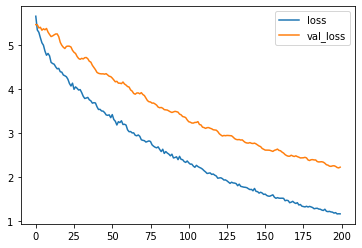

In [50]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots MC

In [51]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Clustering_tr_3f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


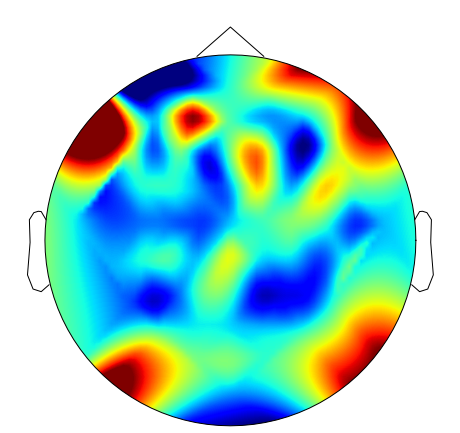

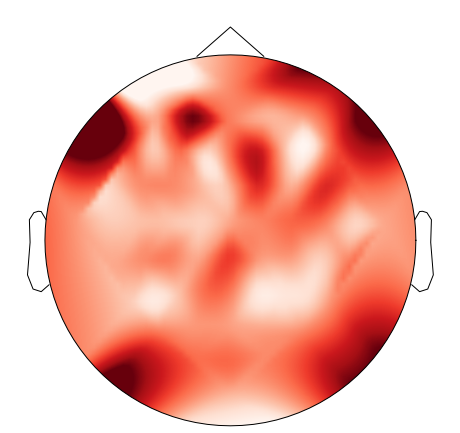

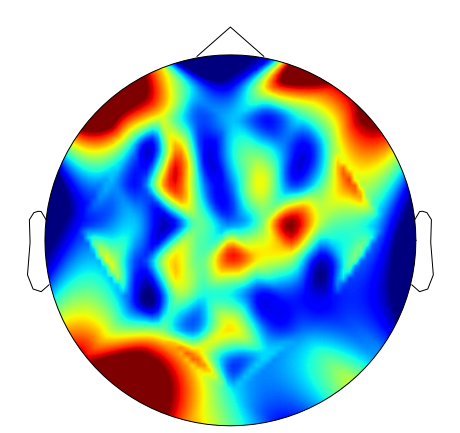

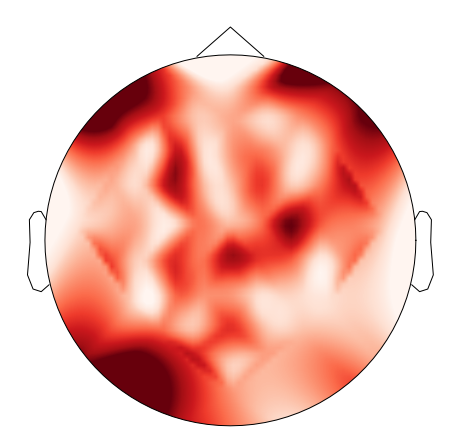

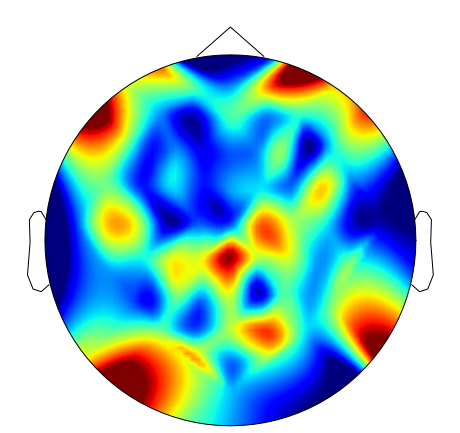

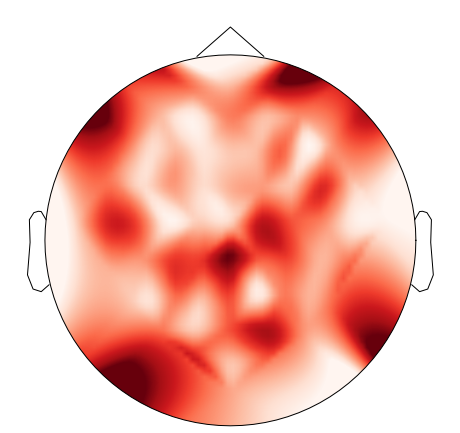

In [52]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_3f_MC_topo_t')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_MC_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_3f_MC_All_t')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_3f_MC_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_MC_Cx_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_3f_MC_All_u')

plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_3f_MC_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_2f_MC_Cx_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_tr_3f_MC_All_B')

## Clustering

### Load Data

In [53]:
sc_ma = StandardScaler()
ma_z = sc_ma.fit_transform(pickle.load(open( "phy_y.pickle", "rb" )))
zpca = StandardScaler().fit_transform(ma_z)
zpca.shape

(105, 1)

In [54]:
xtensor = pickle.load(open("phy_V1_suxchaxfre.pickle", "rb" ))[1][:,:,[0,1,2]]

### Training no MC

Epoch 1/200
3/3 [==============================] - 1s 113ms/step - loss: 5.6018 - val_loss: 5.4782
Epoch 2/200
3/3 [==============================] - 0s 25ms/step - loss: 5.2911 - val_loss: 5.4526
Epoch 3/200
3/3 [==============================] - 0s 23ms/step - loss: 5.0588 - val_loss: 5.4037
Epoch 4/200
3/3 [==============================] - 0s 96ms/step - loss: 4.9927 - val_loss: 5.4927
Epoch 5/200
3/3 [==============================] - 0s 24ms/step - loss: 4.8260 - val_loss: 5.4628
Epoch 6/200
3/3 [==============================] - 0s 24ms/step - loss: 4.6870 - val_loss: 5.3741
Epoch 7/200
3/3 [==============================] - 0s 22ms/step - loss: 4.6032 - val_loss: 5.4151
Epoch 8/200
3/3 [==============================] - 0s 24ms/step - loss: 4.4985 - val_loss: 5.3899
Epoch 9/200
3/3 [==============================] - 0s 21ms/step - loss: 4.4182 - val_loss: 5.4141
Epoch 10/200
3/3 [==============================] - 0s 21ms/step - loss: 4.3862 - val_loss: 5.3038
Epoch 11/200
3/3 [

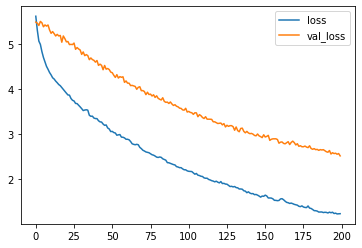

In [55]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots no MC

In [56]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Clustering_3f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


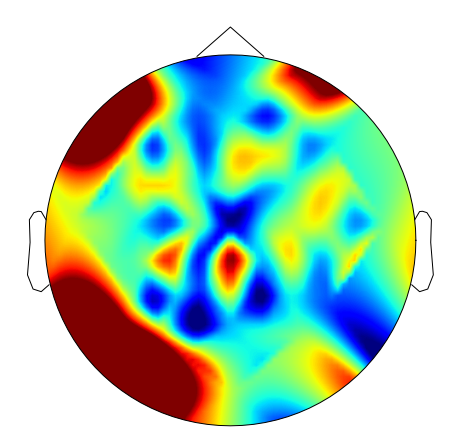

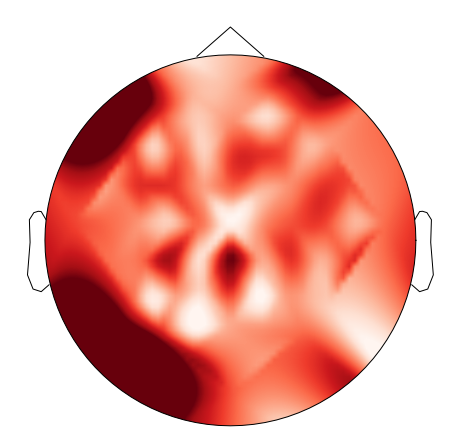

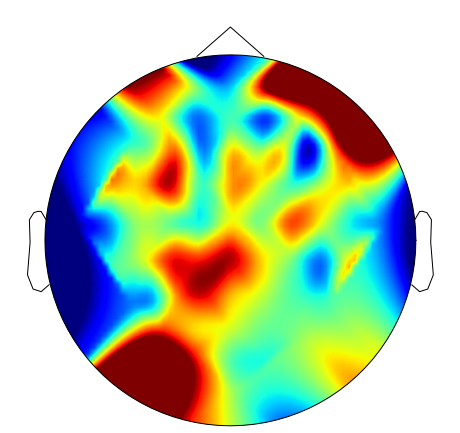

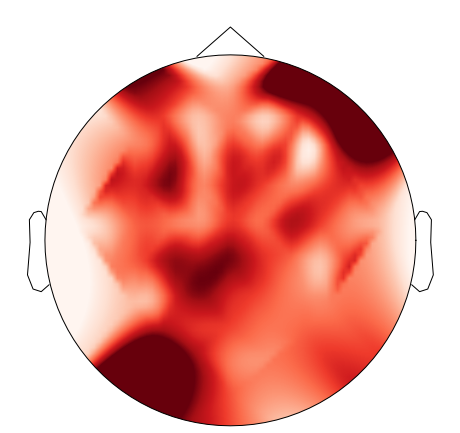

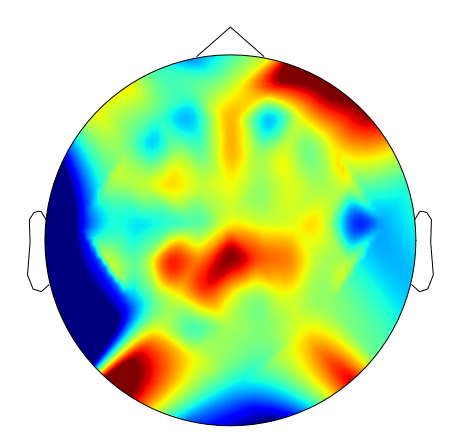

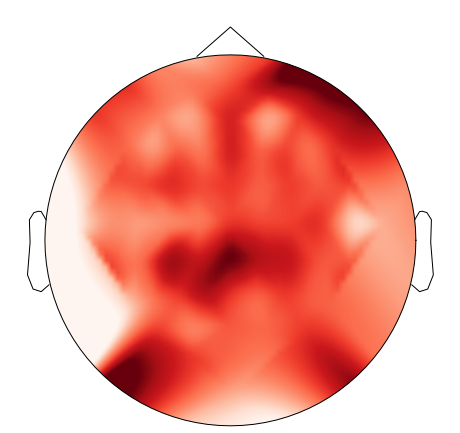

In [57]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_3f_topo_t')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_3f_All_t')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_3f_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_Cx_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_3f_All_u')

plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_3f_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_Cx_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_3f_All_B')

### Training MC

Epoch 1/200
3/3 [==============================] - 1s 195ms/step - loss: 5.6378 - val_loss: 5.3591
Epoch 2/200
3/3 [==============================] - 0s 26ms/step - loss: 5.3816 - val_loss: 5.3286
Epoch 3/200
3/3 [==============================] - 0s 22ms/step - loss: 5.1983 - val_loss: 5.4922
Epoch 4/200
3/3 [==============================] - 0s 25ms/step - loss: 5.1458 - val_loss: 5.4666
Epoch 5/200
3/3 [==============================] - 0s 22ms/step - loss: 5.0294 - val_loss: 5.3507
Epoch 6/200
3/3 [==============================] - 0s 22ms/step - loss: 4.9694 - val_loss: 5.3767
Epoch 7/200
3/3 [==============================] - 0s 24ms/step - loss: 4.8849 - val_loss: 5.5309
Epoch 8/200
3/3 [==============================] - 0s 24ms/step - loss: 4.8278 - val_loss: 5.5873
Epoch 9/200
3/3 [==============================] - 0s 22ms/step - loss: 4.8221 - val_loss: 5.5545
Epoch 10/200
3/3 [==============================] - 0s 22ms/step - loss: 4.7108 - val_loss: 5.4593
Epoch 11/200
3/3 [

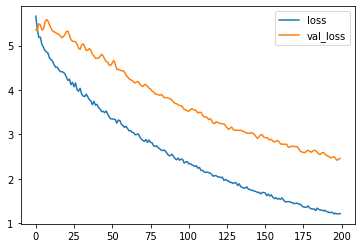

In [58]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots MC

In [59]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/Clustering_3f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


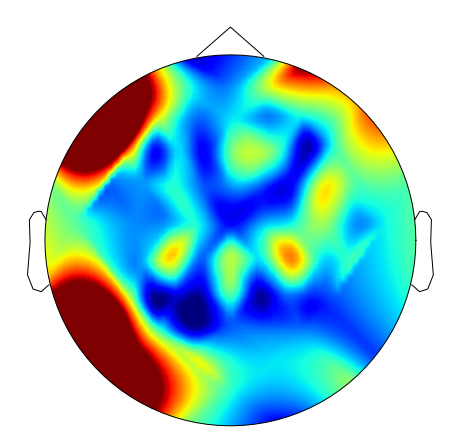

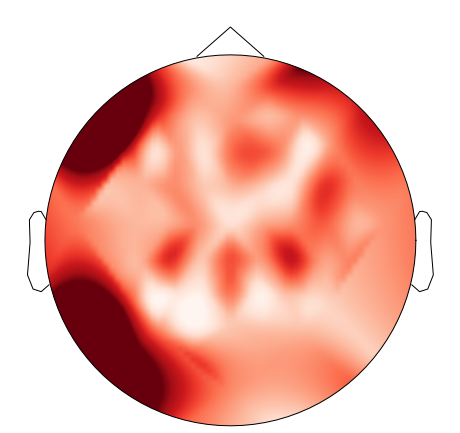

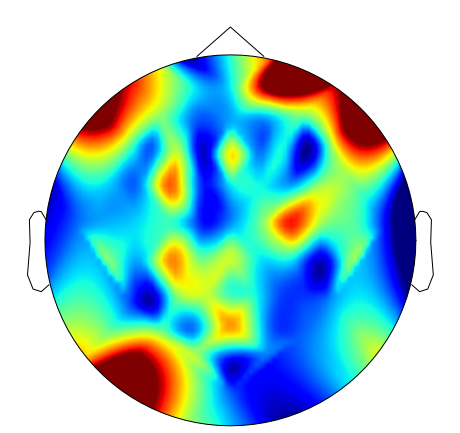

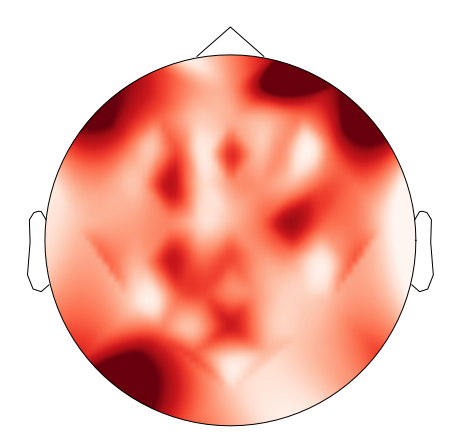

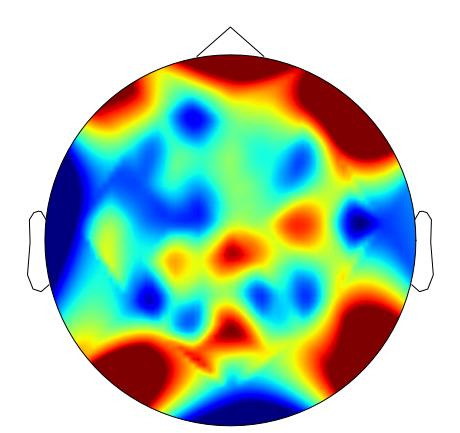

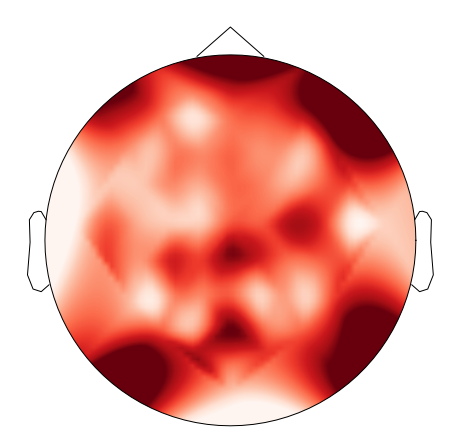

In [60]:
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_3f_MC_topo_t')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_Cx_u')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_3f_MC_All_t')

plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_3f_MC_topo_u')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_Cx_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_3f_MC_All_u')

plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_3f_MC_topo_B')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.5,size=(8,8),mode="Cx",weigths=False,colormap=False,save=True,name=Path_def+'Topoplots/Clustering_2f_MC_Cx_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",weigths=False,cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/Clustering_3f_MC_All_B')